# WeatherPy
----

3 Observations

There is a high correlation between max temperature and latitude, as you get closer to 0 there is a high probability that the max temperature will be higher

There is no correlation between wind speeds and latitude, the correlation coefficient is far too low to show any correlation 


When running this code I found that there were usually about 50 cities that could not get data on, I think that for the amount of records that I pulled getting 90 percent of the weather data back shows that we have a good sample size from around the world


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/NathanAsh_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

637


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
params = {
    'city': cities,
    'key': weather_api_key
}

#creating a DF to hold the values to be collected
city_df = pd.DataFrame({
    "City" :cities
})

# Creating empty columns to hold the values created in the for loop
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
dinde =[]

# Create counters
set = 1
count = 1

#for loop to fill in the needed items for the cities
for index,row in city_df.iterrows():
#     settinup API Grabs
    url = f"http://api.openweathermap.org/data/2.5/weather?q={row[0]}&appid={params['key']}"
    check = requests.get(url)
    try:
#         #Adding city information to the DF
        city_df.loc[index, "Lat"] = check.json()['coord']['lat']
        city_df.loc[index,"Lng"] = check.json()['coord']['lon']
        city_df.loc[index,"Max Temp"] = check.json()['main']['temp_max']
        city_df.loc[index,"Humidity"] = check.json()['main']['humidity']
        city_df.loc[index,"Cloudiness"] = check.json()['clouds']['all']
        city_df.loc[index,"Wind Speed"] = check.json()['wind']['speed']
        city_df.loc[index,"Country"] = check.json()['sys']['country']
        city_df.loc[index,"Date"] = check.json()['dt']
        city_df.loc[index,'Country'] = check.json()['sys']['country']
#         If the information is found this it returns a processing response and the city name
        print(f'Processing Record {count} of Set {set} | {row[0]}')
#         Counter for the accepted rows and the sets
        count += 1
        if count == 50:
            count = 0
            set += 1
    except:
#         If the information isnt found this it returns a failed response and the city name
        print(f'Failed: missing result | {row[0]}')
#     storing indexes for deleting 
        dinde.append(index)


###Deleted rows here based off the list of indexes

for i in range(len(dinde)):
    city_df.drop(city_df.index[i],inplace = True)  



Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | raudeberg
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ca mau
Failed: missing result | meyungs
Processing Record 5 of Set 1 | nouadhibou
Processing Record 6 of Set 1 | moose jaw
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | mnogovershinnyy
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | kholtoson
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | enshi
Processing Record 17 of Set 1 | puri
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | chernyshevskiy
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | vitim
Processing Record 24 of Set 1 | s

Processing Record 37 of Set 4 | grand gaube
Failed: missing result | karkaralinsk
Processing Record 38 of Set 4 | kyra
Processing Record 39 of Set 4 | koslan
Processing Record 40 of Set 4 | oildale
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | castrillon
Processing Record 43 of Set 4 | hervey bay
Processing Record 44 of Set 4 | san julian
Processing Record 45 of Set 4 | pascagoula
Failed: missing result | saleaula
Processing Record 46 of Set 4 | tazovskiy
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | kavaratti
Failed: missing result | tabukiniberu
Processing Record 0 of Set 5 | yanaul
Processing Record 1 of Set 5 | farafangana
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | shenjiamen
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | teguise
Processing Record 6 of Set 5 | klaksvik
Failed: missing result | amderma
Processing Record 7 of Set 5 | jiazi


Processing Record 25 of Set 8 | moerai
Processing Record 26 of Set 8 | tahe
Processing Record 27 of Set 8 | terenos
Processing Record 28 of Set 8 | barentu
Processing Record 29 of Set 8 | nagato
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | trinidad
Processing Record 33 of Set 8 | aden
Processing Record 34 of Set 8 | bayji
Processing Record 35 of Set 8 | nola
Processing Record 36 of Set 8 | amberley
Processing Record 37 of Set 8 | bulungu
Processing Record 38 of Set 8 | rio gallegos
Processing Record 39 of Set 8 | pashiya
Processing Record 40 of Set 8 | ingham
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | nambucca heads
Processing Record 43 of Set 8 | west helena
Processing Record 44 of Set 8 | anori
Failed: missing result | sumbawa
Failed: missing result | nguiu
Processing Record 45 of Set 8 | usevya
Processing Record 46 of Set 8 | parana
Processing Record 47 of Set 8 | kalmunai
Process

Processing Record 11 of Set 12 | maragogi
Processing Record 12 of Set 12 | kisangani
Processing Record 13 of Set 12 | port hedland
Processing Record 14 of Set 12 | winnemucca
Failed: missing result | kuche
Processing Record 15 of Set 12 | port moresby
Processing Record 16 of Set 12 | metu
Processing Record 17 of Set 12 | isiro
Processing Record 18 of Set 12 | livingston
Processing Record 19 of Set 12 | nizhnevartovsk
Processing Record 20 of Set 12 | moyobamba
Failed: missing result | cam pha
Processing Record 21 of Set 12 | itaituba
Processing Record 22 of Set 12 | zatoka
Processing Record 23 of Set 12 | sondrio
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | sinnamary
Processing Record 26 of Set 12 | bowen
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | surt
Processing Record 29 of Set 12 | butwal
Processing Record 30 of Set 12 | san borja
Processing Record 31 of Set 12 | lere
Processing Record 32 of Set 12 | uirauna
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#display number of cities removed
print(f'{len(dinde)} cities were not found and removed')  
#display count
city_df.count()

50 cities were not found and removed


City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
#show preview of data to check DataFrame
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,raudeberg,61.99,5.14,287.59,94,12,2.74,NO,1597526936
3,ca mau,9.18,105.15,298.34,87,53,1.42,VN,1597526936
5,nouadhibou,20.93,-17.03,296.15,78,0,8.7,MR,1597526937
7,rikitea,-23.12,-134.97,294.7,76,0,5.92,PF,1597526937
9,faanui,-16.48,-151.75,298.86,80,100,7.29,PF,1597526938


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#create a variable to hold the number of cities 
tothum = len(city_df)
# change the type of the numbers in the Humidity column to numbers
city_df['Humidity']  = pd.to_numeric(city_df['Humidity'])
# find the number of cities with humidity over 100%
under = city_df['Humidity'].gt(100).value_counts()
# print the results
print(f'There are {tothum} cities and {under[0]} of those cities \nhave humidity recording under 100% humidity')
# print a prompt if true(if there are no rows to get rid of)
if tothum == under[0]:
    print(f'There are no cities with humidity over 100%')


There are 587 cities and 587 of those cities 
have humidity recording under 100% humidity
There are no cities with humidity over 100%


In [7]:
#  Get the indices of cities that have humidity over 100%.
#create an if statement to find how to present the information
#if there are no cities to get rid of use the full index
if tothum == under[0]:
    print(f'There are no cities with humidity over 100%')
    index = city_df[city_df['Humidity'].gt(100)].index
else:
    print(f'There are no cities with humidity over 100%')
    index = city_df[city_df['Humidity'].gt(100)].index[0]
index


There are no cities with humidity over 100%


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clcity = city_df.loc[city_df['Humidity'].gt(100)==False]
clcity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,raudeberg,61.99,5.14,287.59,94.0,12,2.74,NO,1597526936
3,ca mau,9.18,105.15,298.34,87.0,53,1.42,VN,1597526936
5,nouadhibou,20.93,-17.03,296.15,78.0,0,8.7,MR,1597526937
7,rikitea,-23.12,-134.97,294.7,76.0,0,5.92,PF,1597526937
9,faanui,-16.48,-151.75,298.86,80.0,100,7.29,PF,1597526938
...,...,...,...,...,...,...,...,...,...
632,tabou,4.42,-7.35,297.18,83.0,78,4.84,CI,1597527067
633,sharjah,25.36,55.4,308.15,75.0,52,1.5,AE,1597527121
634,arlit,18.74,7.39,304.51,44.0,85,6.56,NE,1597527121
635,azrow,,,,NaN,,,,


In [9]:
# Extract relevant fields from the data frame
#convert Kelvin to F
rcity = clcity[['City','Lat','Lng',"Max Temp",'Humidity', 'Cloudiness','Wind Speed','Country' ]]
rcity = rcity.dropna(how = 'any')
rcity = pd.DataFrame(rcity)
rcity['Max Temp']  = pd.to_numeric(rcity['Max Temp'],errors = 'coerce')
rcity['Max Temp'] = (rcity['Max Temp']) *9/5 -459.67
rcity = rcity.rename(columns = {
    'Lat': "Latitude",
    'Lng': "Longitude",
    "Max Temp": 'Max Tempurature (F)',
    "Humidity": 'Humidity (%)',
    'Cloudiness' : 'Cloudiness (%)',
    'Wind Speed': 'Wind Speed (mph)'
})

# Export the City_Data into a csv
rcity.to_csv(output_data_file)
rcity

,City,Latitude,Longitude,Max Tempurature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country
1,raudeberg,61.99,5.14,57.992,94.0,12,2.74,NO
3,ca mau,9.18,105.15,77.342,87.0,53,1.42,VN
5,nouadhibou,20.93,-17.03,73.400,78.0,0,8.7,MR
7,rikitea,-23.12,-134.97,70.790,76.0,0,5.92,PF
9,faanui,-16.48,-151.75,78.278,80.0,100,7.29,PF
...,...,...,...,...,...,...,...,...
631,camacha,33.08,-16.33,71.600,68.0,40,4.1,PT
632,tabou,4.42,-7.35,75.254,83.0,78,4.84,CI
633,sharjah,25.36,55.4,95.000,75.0,52,1.5,AE
634,arlit,18.74,7.39,88.448,44.0,85,6.56,NE


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

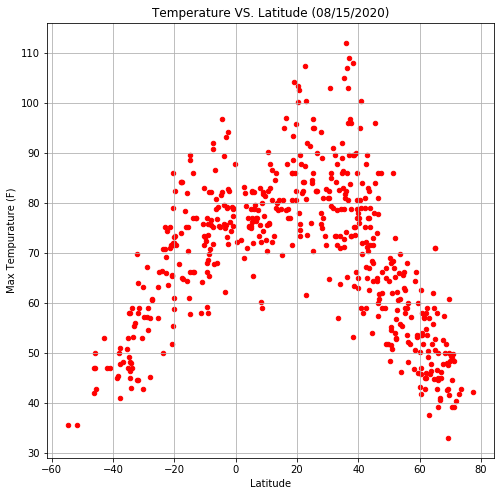

In [15]:
# Choose columns to focus on
temlat = rcity[['Max Tempurature (F)','Latitude']]
# plot the information onto the graph
temlat.plot(kind='scatter',x = 'Latitude',y = 'Max Tempurature (F)',
            color = 'red', grid = True,figsize= (8,8))
# Update title
plt.title(f"Temperature VS. Latitude (08/15/2020)")
# show the data
plt.show()

## Latitude vs. Humidity Plot

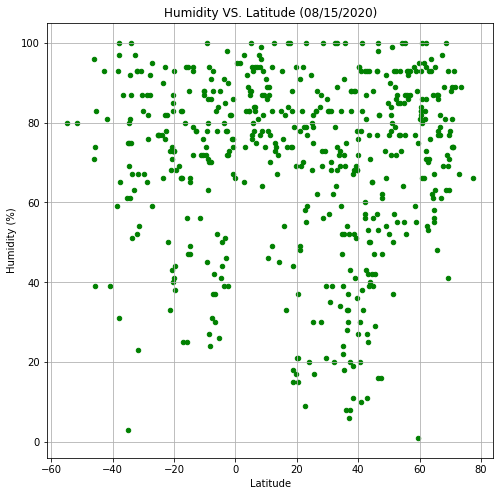

In [16]:
# Choose columns to focus on
humlat = rcity[['Humidity (%)','Latitude']]
# plot the information onto the graph
humlat.plot(kind='scatter',x = 'Latitude',y = 'Humidity (%)',
            color = 'green', grid = True,figsize= (8,8))
# Update title
plt.title("Humidity VS. Latitude (08/15/2020)")
# show the data
plt.show()

## Latitude vs. Cloudiness Plot

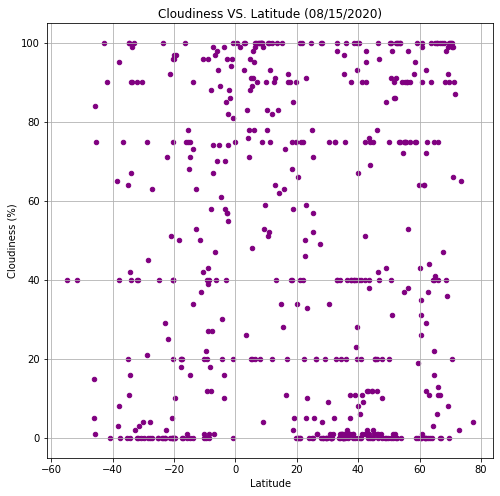

In [17]:
# Choose columns to focus on
clolat = rcity[['Cloudiness (%)','Latitude']]
# plot the information onto the graph
clolat.plot(kind='scatter',x = 'Latitude',y = 'Cloudiness (%)',
            color = 'purple', grid = True,figsize= (8,8))
# Update title
plt.title("Cloudiness VS. Latitude (08/15/2020)")
# show the data
plt.show()

## Latitude vs. Wind Speed Plot

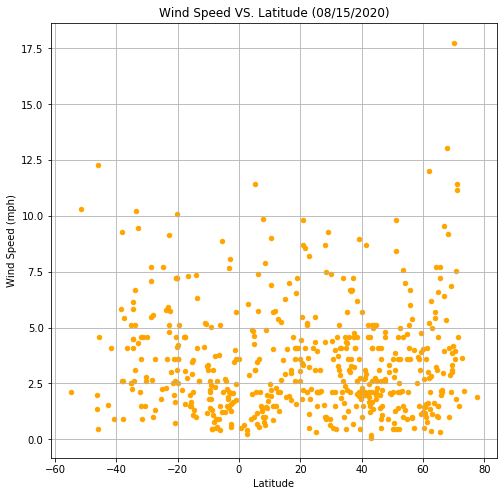

In [18]:
# Choose columns to focus on
clolat = rcity[['Wind Speed (mph)','Latitude']]
# plot the information onto the graph
clolat.plot(kind='scatter',x = 'Latitude',y = 'Wind Speed (mph)',
            color = 'orange', grid = True,figsize= (8,8))
# Update title
plt.title("Wind Speed VS. Latitude (08/15/2020)")
# show the data
plt.show()

## Linear Regression

The Corr coefficient is -0.69


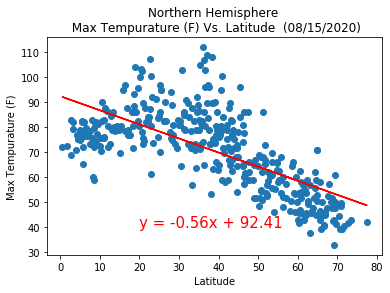

The Corr coefficient is 0.813


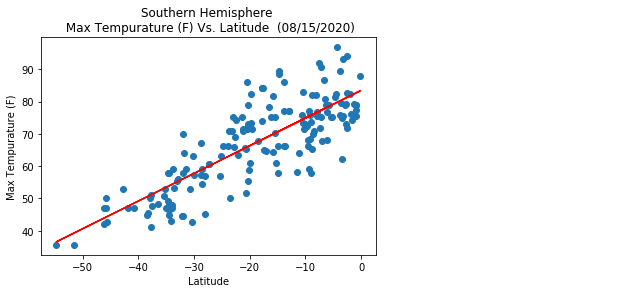

The Corr coefficient is 0.012


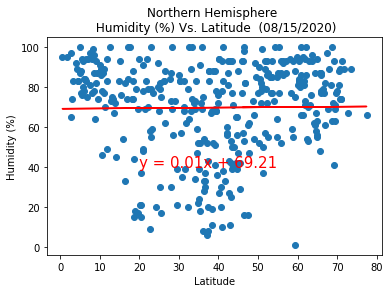

The Corr coefficient is -0.101


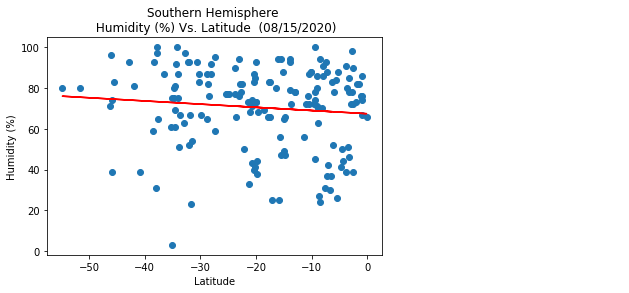

The Corr coefficient is -0.107


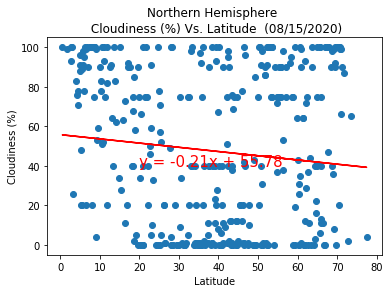

The Corr coefficient is 0.162


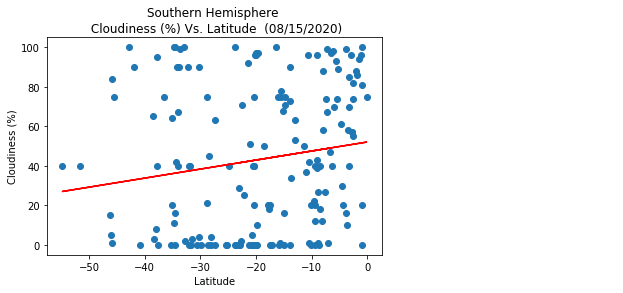

The Corr coefficient is 0.068


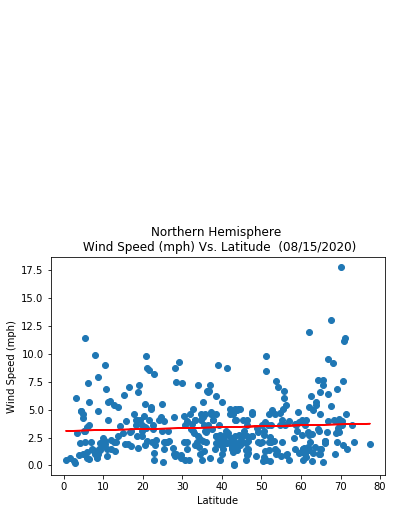

The Corr coefficient is -0.286


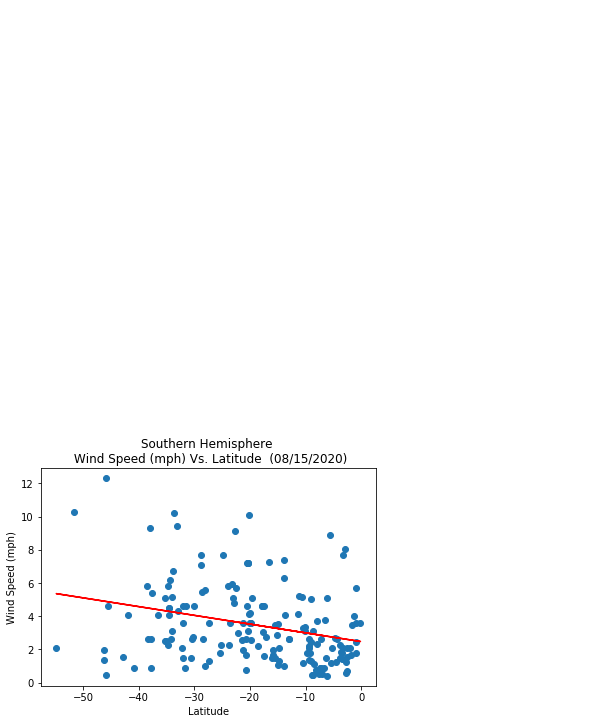

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames



# create variable to count to split the Northern and Southern data
count = 0
# list of items to compare against Latitude
items = ['Max Tempurature (F)','Max Tempurature (F)','Humidity (%)','Humidity (%)',
        'Cloudiness (%)','Cloudiness (%)','Wind Speed (mph)','Wind Speed (mph)']
# Counter to change the corr coeficient
corin = 0
# for loop to run through each graph
for i in items:
#   copy of the DF and then creating all the items in the columns to use into numbers
    Nlat = rcity.copy()
    Nlat['Max Tempurature (F)']  = pd.to_numeric(Nlat['Max Tempurature (F)'])
    Nlat['Humidity (%)']  = pd.to_numeric(Nlat['Humidity (%)'])
    Nlat['Cloudiness (%)']  = pd.to_numeric(Nlat['Cloudiness (%)'])
    Nlat['Wind Speed (mph)']  = pd.to_numeric(Nlat['Wind Speed (mph)'])
    Nlat[i]  = pd.to_numeric(Nlat[i])
#     use the if statements to switch graphs between Northern and Southern Hemisphere
    if (count %2) ==0:
#         locate all Northern Latitude rows
        Nlat = Nlat.loc[temlat['Latitude'].gt(0)==True]
#     update variable for the title
        area = 'North'
        corin += 1
    else:
#         locate all Northern Latitude rows
        Nlat = Nlat.loc[temlat['Latitude'].gt(0)==False]
#     update variable for the title
        area = 'South'
#    update counter     
    count += 1   
    
    
    
# make latitude column into number
    Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
#     create a list of lists of the corr coeficient.
    Corlat = Nlat.corr()
#     grab the coeficient and store it in a variable then put it in the print statement
    corlat = round(Corlat['Latitude'][corin],3)
    print(f'The Corr coefficient is {corlat}')
    
# Create variables for plotting 
    x_values = Nlat['Latitude']
    y_values = Nlat[i]
#     create linear regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plot the variables and linear regression to the graph
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,40),fontsize=15,color="red")
#     Add labels to the graph
    plt.xlabel('Latitude')
    plt.ylabel(i)
#     add Hemisphere and name of graph
    plt.title(f'{area}ern Hemisphere \n {i} Vs. Latitude  (08/15/2020)')
    plt.show()

####  Northern & Southern Hemisphere - Max Temp vs. Latitude Linear Regression

    The max temperatures decrease as you climb up towards the top/bottom of the Northern or Southern Hemisphere. The correlation coefficient is nearing -.8 or .8 which is a strong number, so I would say that the line on the scatter chart has a high probability of correlation to the truth

####  Northern & Southern Hemisphere -  Humidity vs. Latitude Linear Regression

For Humidity, the correlation coefficient is quite low for both the Northern and Southern graphs. I would say there is little connection to Humidity and the increase or decrease in latitude.   

####  Northern & Southern Hemisphere -  Hemisphere  vs. Latitude Linear Regression
The correlation Coefficient is mightier on the Southern Hemisphere and has a higher slope for linear regression but does not have enough to correlation to say that change in latitude will change the cloudiness of the location.

####  Northern & Southern Hemisphere -  Wind Speed  vs. Latitude Linear Regression

Looking at the data there is little to no correlation between wind speed and the latitude. The correlation coefficient and the linear regression show no correlation between wind speed and latitude in either the Northern or Southern Hemisphere.
